# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     Dayanni   |
| **Fecha**     29/08/2025 |   |
| **Expediente*749206* |   |

## Regresión polinomial

Observa la siguiente gráfica.

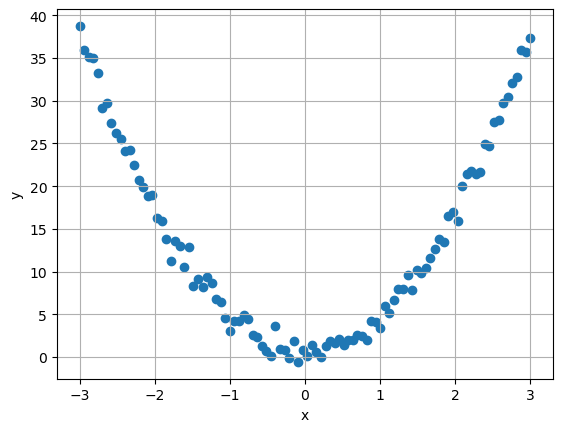

In [96]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y)
plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
x = x.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
print("Intercepto (b0):", lr.intercept_)   # constante
print("Coeficiente (b1):", lr.coef_)       # pendiente

Intercepto (b0): 13.30223225795873
Coeficiente (b1): [-0.04955448]
R2: 5.80345273922811e-05


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [ ]:
import matplotlib.pyplot as plt

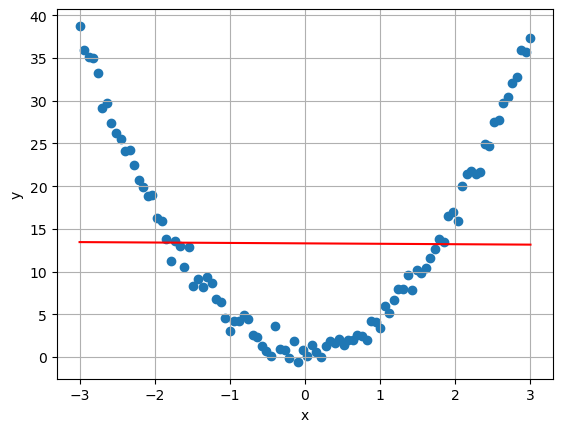

In [47]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y)
plt.grid()
plt.plot(x, lr.predict(x), color='red')
plt.show()

In [49]:
R2_orden1 = r2_score(y, lr.predict(x))
print("R2:",R2_orden1)   # error

R2: 5.80345273922811e-05


R2 nos da prácticamente 0, como observamos en la gráfica, es una terrible aproximación.

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [94]:
X = np.hstack([x,(x**2),(x**3)])

In [59]:
lr = LinearRegression()
lr.fit(X,y)
print("Intercepto (b0):", lr.intercept_)   # constante<
print("Coeficiente (b1):", lr.coef_)       # pendiente
R2_orden1 = r2_score(y, lr.predict(X))     #
print("R2:",R2_orden1)   # error

Intercepto (b0): 0.6194209631804846
Coeficiente (b1): [-6.55753967e-02  4.14388884e+00  2.90847549e-03]
R2: 0.9934129585186598


Notemos como ahora R es casi 1, es una aproximación casi perfecta.

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

C:\Users\dayan\AppData\Local\Temp\ipykernel_13016\2170999642.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_smooth, y3, 'b-', linewidth=2, label='Modelo Orden 3', color = 'red')


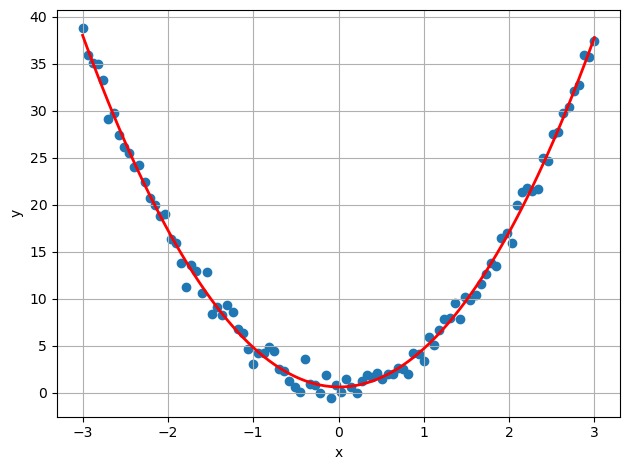

In [92]:
# Crear puntos suaves para graficar
x_smooth = np.linspace(x.min(), x.max(), 100)

# Orden 3: y = b0 + b1*x + b2*x² + b3*x³
lr.fit(X, y)
coefs = lr.coef_
y3 = lr.intercept_ + coefs[0]*x_smooth + coefs[1]*x_smooth**2 + coefs[2]*x_smooth**3

plt.figure()
plt.scatter(x, y)
plt.plot(x_smooth, y3, 'b-', linewidth=2, label='Modelo Orden 3', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.tight_layout()
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [123]:
def regresion_polinomial(x, y, grado):
    X_poly = np.column_stack([x**i for i in range(1, grado + 1)])
    lr = LinearRegression().fit(X_poly, y)
    r2 = r2_score(y, lr.predict(X_poly))
    
    print(f"Grado {grado}: R² = {r2:.6f}")
    return lr, r2

for grado in [3, 5, 7, 9,11]:
    lr, r2 = regresion_polinomial(x, y, grado)

Grado 3: R² = 0.993413
Grado 5: R² = 0.993495
Grado 7: R² = 0.993509
Grado 9: R² = 0.993514
Grado 11: R² = 0.993534


Crea una gráfica por cada modelo con las observaciones y su curva.

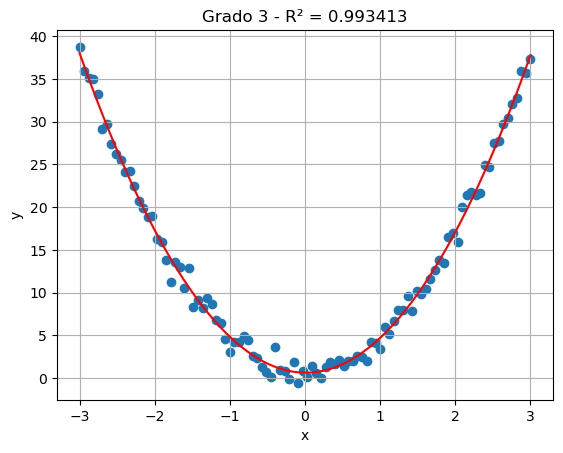

Grado 3: R² = 0.993413



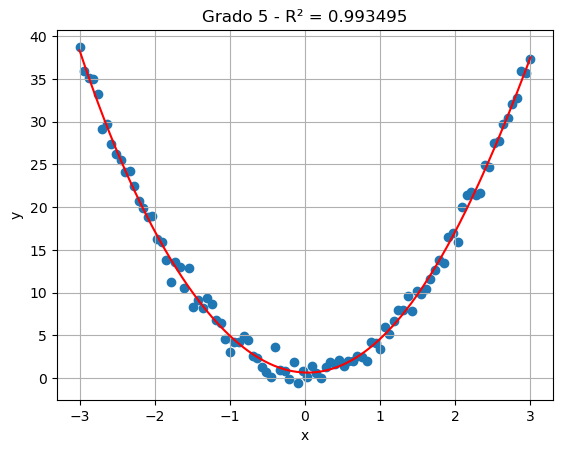

Grado 5: R² = 0.993495



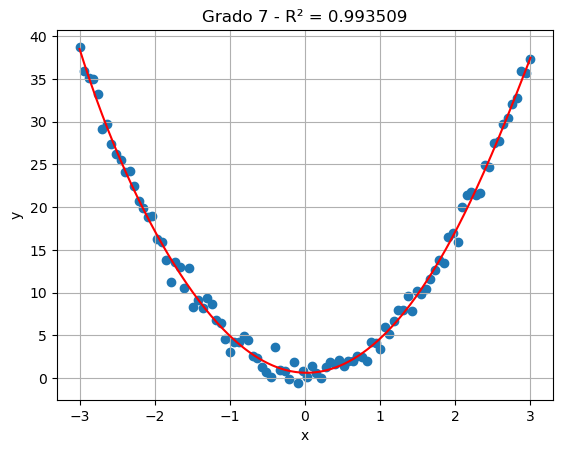

Grado 7: R² = 0.993509



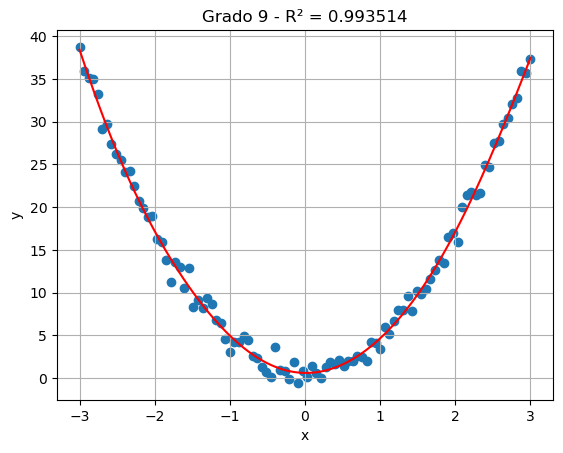

Grado 9: R² = 0.993514



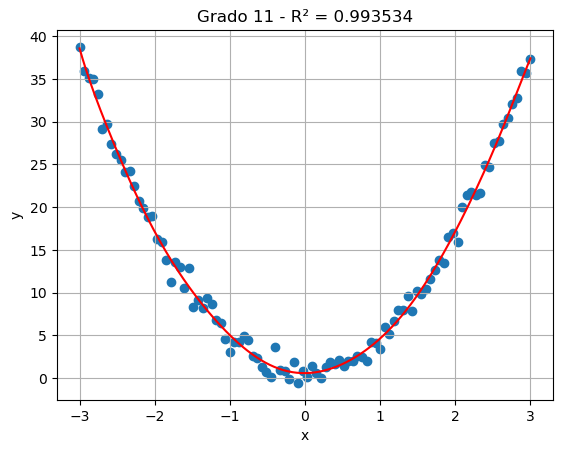

Grado 11: R² = 0.993534



In [121]:
for grado in [3, 5, 7, 9, 11]:
    X_poly = np.column_stack([x**i for i in range(1, grado + 1)])
    lr = LinearRegression().fit(X_poly, y)
    r2 = r2_score(y, lr.predict(X_poly))
    
    # Puntos suaves
    x_smooth = np.linspace(x.min(), x.max(), 300)
    X_smooth = np.column_stack([x_smooth**i for i in range(1, grado + 1)])
    y_smooth = lr.predict(X_smooth)
    
    # Graficar
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x_smooth, y_smooth, 'red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Grado {grado} - R² = {r2:.6f}')
    plt.grid()
    plt.show()
    
    print(f"Grado {grado}: R² = {r2:.6f}\n")

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El de grado 3, porque es el más simple con un R alto, viéndolo desde un punto de vista de optimización, subir de grado no tiene sentido.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [139]:
x_pred = 5

for grado in [3, 5, 7, 9, 11]:
    lr, r2 = regresion_polinomial(x, y, grado)
    
    # Crear características polinomiales para x = 5
    x_features = np.array([x_pred**i for i in range(1, grado + 1)]).reshape(1, -1)
    prediccion = lr.predict(x_features)[0]
    
    print(f"Grado {grado}: ŷ = {prediccion:.4f}")
    print()

Grado 3: R² = 0.993413
Grado 3: ŷ = 104.2523

Grado 5: R² = 0.993495
Grado 5: ŷ = 84.5990

Grado 7: R² = 0.993509
Grado 7: ŷ = 33.7432

Grado 9: R² = 0.993514
Grado 9: ŷ = 215.7364

Grado 11: R² = 0.993534
Grado 11: ŷ = -5265.3443



¿Cuál modelo crees que sea mejor?

El de grado 3, el de 11 queda descartadísimo, el de grado 7 parece muy pequeño, grado 5 y 9 parecen posibles, pero el grado 3 está entre esos dos, así que grado 3.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3